## Test of different methods for text detection using pytesseract OCR

This project was developed to research different methods of changing images to detect the text using pytesseract. There are 2 different experiments to recognize:
1. Which filter best fit the task 
2. What is the impact of thresh value and blur value on the text detectrion
The third experiment was made to show b-boxes on image 


#### Imports 

In [1]:
import cv2
import pytesseract
from Levenshtein import distance
import matplotlib.pyplot as plt
import IPython.display
import imutils
from io import BytesIO
import PIL.Image
import numpy as np

#### Connection of pytesseract and showing languge config

In [2]:

#connection of pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\user\Tesseract-OCR\tesseract.exe'
#language config
print(pytesseract.get_languages(config = ''))
tessedit_preserve_min_wd_len = 6
tessedit_pageseg_mode = 0
tessedit_ocr_engine_mode = 5

['eng', 'osd', 'rus']


#### Reading image

In [3]:
image = cv2.imread("Images/Obrazets_12.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#### Methods

In [4]:
#method for thresholding image
def kontrast (photo,thresh):
    return cv2.threshold(photo, thresh, 255, cv2.THRESH_BINARY)[1]

#image noise removal
def remove_noise(photo, blur):
    return cv2.medianBlur(photo, blur)

#blurring
def blur(photo):
    #img_blur = cv2.GaussianBlur(photo, (5, 5), 0)
    #cv2.imwrite(r"./preprocess/img_blur.png", photo)
    return cv2.GaussianBlur(photo, (5, 5), 0)

#method that includes 2 different blur types for noise removal
def Changing(photo):
    thresh = 205
    img_blur = cv2.GaussianBlur(photo, (5, 5), 5)
    image_BlN = cv2.medianBlur(img_blur, 7)
    return image_BlN
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#### Changing image using different methods

In [5]:
blurred = blur(image)
removed_noise = remove_noise(image, 5)
res = Changing(image)
kontr = kontrast(res, 200)
kernel = opening(image)

#### Starting of the experiment  

In [6]:
#creating a massive with filtered images
variations = {"Original": image, "Blur": blurred, "Noiseless": removed_noise, "Res": res, "Kontrast": kontr, "Kernel": kernel}
prediction_accuracy = {}
img = cv2.resize(image, (1024, 728))
#cv2.imshow("Image", img)  # showing resized image
#plt.imshow(img)

#### The first experiment - trying to detect text on filtered objects 

In [7]:
ground = 'Tesseract Sample'

for i in variations:
    text = pytesseract.image_to_string(variations[i], lang = 'rus+eng')
    print(i + ': \nText prediction: \n' + text + '\nAccuracy: ')
    print(distance(ground, text))  # Calculating Levenshtein distance

    print('\n')

Original: 
Text prediction: 

Accuracy: 
16


Blur: 
Text prediction: 
‚ Р887/7-1Ь


Accuracy: 
16


Noiseless: 
Text prediction: 
»P887/7-1b


Accuracy: 
16


Res: 
Text prediction: 

Accuracy: 
16


Kontrast: 
Text prediction: 

Accuracy: 
16


Kernel: 
Text prediction: 

Accuracy: 
16




#### The second the experiment  - changing blur and contrast to find the best value for each image


Text prediction: 





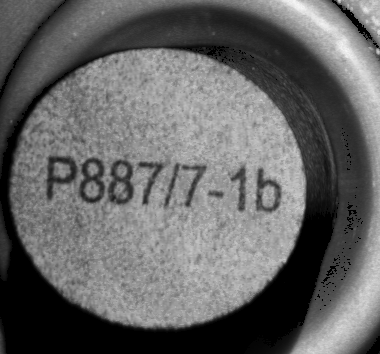

In [8]:
thresh = 0
blur=7
def array_to_image(a, fmt='png'):
    f = BytesIO()    
    PIL.Image.fromarray(a).save(f, fmt)    
    return IPython.display.Image(data=f.getvalue())
image = cv2.imread("Images/Obrazets_12.png")
array_to_image(image)
SuperBl = remove_noise(image, blur)
variations2={"Blured":image}
#cv2.imshow("window", SuperBl)
#cv2.imshow(kontr)
#prediction_accuracy = {}
thresh = thresh+256
blur = blur+2
for i in variations2:
#         print ("Thresh", thresh)
    text = pytesseract.image_to_string(variations2[i], lang='rus+eng')
    print('\nText prediction: \n' + text)
    print('\n')
array_to_image(image)

    


#### The third experiment - showing the text and word-boxes using pytesseract.image_to_data

In [9]:

d = pytesseract.image_to_data(img, lang='rus', output_type=pytesseract.Output.DICT)         
n_boxes = len(d['level'])
text = ''
for i in range(n_boxes):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    text= ' '.join(d['text'])+' '
    #print(thresh)
#d1 = IPython.display.display(None, display_id=3)
#showing text
print(text)
#showing image
#array_to_image(img)  
# cv2.waitKey(0)
# cv2.destroyAllWindows()

    › РВВ7/7-лЬ     


#### Result of the last experiment is b-box with text on image

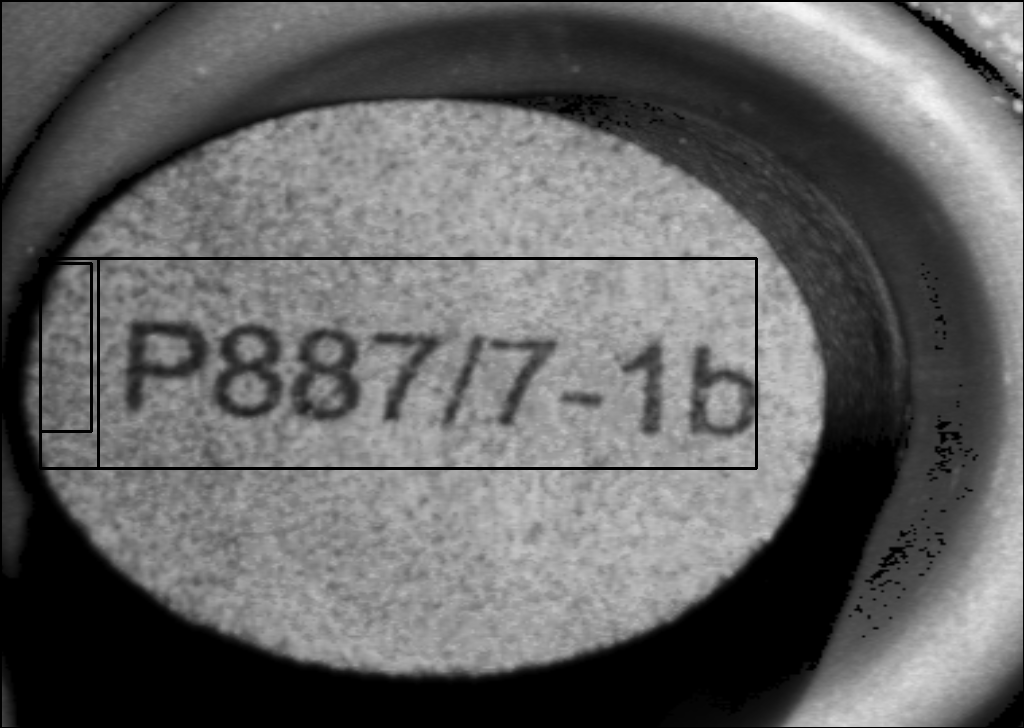

In [10]:
def array_to_image(a, fmt='png'):
    f = BytesIO()    
    PIL.Image.fromarray(a).save(f, fmt)    
    return IPython.display.Image(data=f.getvalue())
array_to_image(img)

In [11]:
import re
import cv2
import pytesseract
from pytesseract import Output

img = cv2.imread('Images/Obrazets_12.png')
d = pytesseract.image_to_data(img, lang = 'rus', output_type=Output.DICT)
keys = list(d.keys())

# date_pattern = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'
date_pattern = 'Р887'


n_boxes = len(d['text'])
for i in range(n_boxes):
        if re.match(date_pattern, d['text'][i]):
            (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
            img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2.imshow('img', img)
cv2.waitKey(0)

-1

#### Ending of program

In [12]:
cv2.waitKey(0)
cv2.destroyAllWindows()